In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Value Function Iteration

### construct functions in need

In [2]:
def gridmaker(start, end, N):
    '''
    input: starting point, end point, # of grids
    output: list of grid points between starting point & end point
    '''
    step = float((end - start)/(N-1))
    target = [start]
    
    for i in range(1,N):
        target.append(start+i*step)
    
    return target

In [42]:
def supnorm(V_old, V_new):
    """
    input: previous value list, updated value list
    output: supnorm
    """
    dist_list = [abs(V_old[i]-V_new[i]) for i in range(len(V_old))]
    distance = max(dist_list)
    return distance

In [138]:
def utility(K, K_prime):
    '''
    input: today and tmr's K
    output: today's utility
    '''
    consumption = A*(K**alpha) + (1-delta)*K - K_prime
    utility = ((consumption**(1-gamma))-1)/(1-gamma)
    
    return utility

In [142]:
### this function will be used in approximating the value function
### since it has its own logic, I split it from the value_function
def reward_matrix(grid, reward_matrix):   
    '''
    input: grid
    output: reward_matrix
            ij component -> utility with K_i and K_prime_j
    '''
    for K in grid:
        K_row = []
        feasible_limit = (1-delta)*K + A*(K**alpha)        
        
        for K_prime in grid:
            if K_prime > feasible_limit:
                K_row.append(-10000)
            else:
                K_row.append(utility(K, K_prime))  ### used defined function "utility"
            
        reward_matrix.append(K_row)        
        
    return reward_matrix

In [133]:
def value_function(grid, threshold):
    '''
    input: reward_matrix
    output: 1. (Dict) Value Function that Spits out Maximized Value under State Variable K
            2. (Dict) Policy Function that Spits out K_prime := argmax(V(K))
    '''
    
    matrix = reward_matrix(grid, [])
    V_old = [0 for i in range(len(grid))]
    
    while True:
        V_new = []
        Policy_Dict = {}
        
        for i in range(len(grid)):
            # given K, calculate value for all the K_primes
            temp = [matrix[i][j] + beta*V_old[j] for j in range(len(grid))] 
            current_K = grid[i]
            argmax_K_prime = grid[temp.index(max(temp))]
            
            V_new.append(max(temp))
            Policy_Dict.update({current_K:argmax_K_prime})
            
        if supnorm(V_old, V_new) < threshold:
            break
            
        else:
            V_old = V_new
    
    Value_Dict = {}
    for i in range(len(grid)):
        Value_Dict.update({grid[i]:V_new[i]})
    
    return Value_Dict, Policy_Dict

## Question 1.3

### (0) set parameters

In [109]:
delta = float(0.05)
beta = float(0.98)
alpha = float(1/3)
gamma = float(2)
A = float(1)

### (1) grid & threshold setting

In [139]:
steady_K = (alpha*A/((1/beta)-1+delta))**(1/(1-alpha))

In [159]:
grid_30 = gridmaker(0.95*steady_K, 1.05*steady_K, 30)
grid_100 = gridmaker(0.95*steady_K, 1.05*steady_K, 100)
grid_300 = gridmaker(0.95*steady_K, 1.05*steady_K, 300)

threshold_weak = 0.0001
threshold_strong = 0.000001

In [160]:
value_30, policy_30 = value_function(grid_30, threshold_weak)
value_100, policy_100 = value_function(grid_100, threshold_weak)
value_300, policy_300 = value_function(grid_300, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

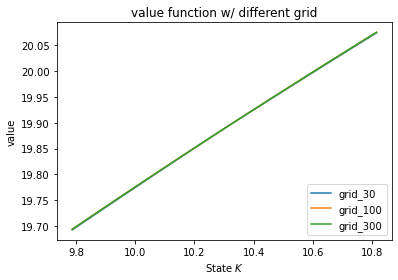

In [167]:
fig, ax = plt.subplots()                          # define plot

ax.plot(value_30.keys(), value_30.values(), label = 'grid_30')
ax.plot(value_100.keys(), value_100.values(), label = 'grid_100')
ax.plot(value_300.keys(), value_300.values(), label = 'grid_300')

ax.set_title('value function w/ different grid')
ax.set(xlabel='State $K$',ylabel='value')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

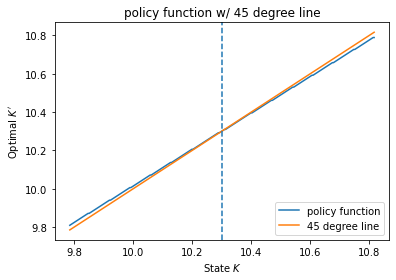

In [182]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy_300.keys(), policy_300.values(), label = 'policy function')
ax.plot(policy_300.keys(), policy_300.keys(), label = '45 degree line')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function w/ 45 degree line')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

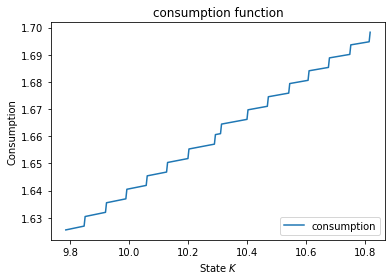

In [199]:
consumption = []
for i in range(len(grid_300)):
    K = grid_300[i]
    temp_list = list(policy_300.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

## Question 1.4

In [206]:
grid2_3000 = gridmaker(0.1*steady_K, 2*steady_K, 3000)
value2_3000, policy2_3000 = value_function(grid2_3000, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

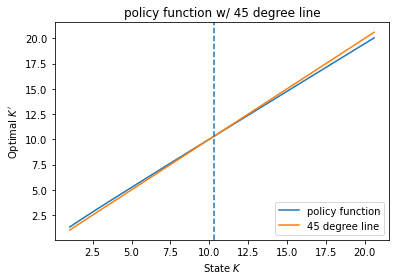

In [423]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_3000.keys(), policy2_3000.values(), label = 'policy function')
ax.plot(policy2_3000.keys(), policy2_3000.keys(), label = '45 degree line')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function w/ 45 degree line')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

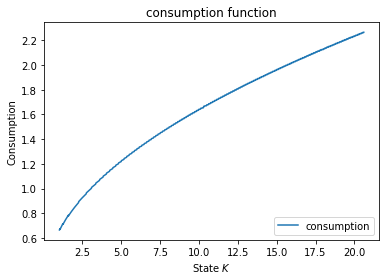

In [426]:
consumption2_3000 = []
for i in range(len(grid2_3000)):
    K = grid2_3000[i]
    temp_list = list(policy2_3000.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid2_3000, consumption2_3000, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

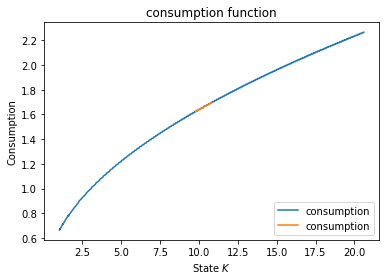

In [207]:
consumption2_3000 = []
for i in range(len(grid2_3000)):
    K = grid2_3000[i]
    temp_list = list(policy2_3000.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid2_3000, consumption2_3000, label = 'consumption')
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

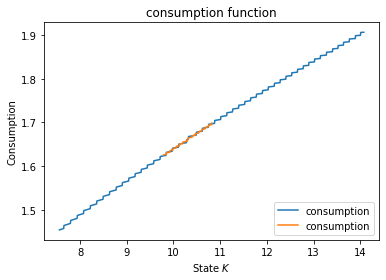

In [211]:
fig, ax = plt.subplots()  
ax.plot(grid2_3000[1000:2000], consumption2_3000[1000:2000], label = 'consumption')
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

## Question 1.5

In [430]:
grid_500 = gridmaker(0.1*steady_K, 2*steady_K, 500)

In [432]:
delta = float(0.05)
beta = float(0.98)
alpha = float(1/3)
gamma = float(2)
A = float(1)

value2_3000, policy2_3000 = value_function(grid_500, threshold_weak)

In [431]:
# (1) increased depreciation 
delta = float(0.1)
beta = float(0.98)
alpha = float(1/3)
gamma = float(2)
A = float(1)
value_new_delta, policy_new_delta = value_function(grid_500, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

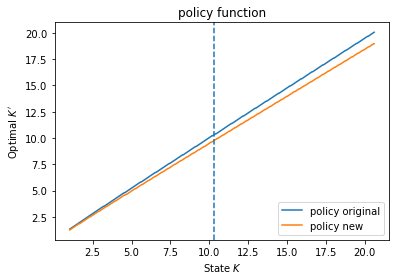

In [433]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_3000.keys(), policy2_3000.values(), label = 'policy original')
ax.plot(policy_new_delta.keys(), policy_new_delta.values(), label = 'policy new')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

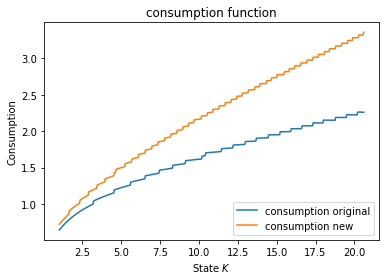

In [434]:
consumption2_3000 = []
consumption_new = []
for i in range(len(grid_500)):
    K = grid_500[i]
    temp_list = list(policy2_3000.values())
    temp_list_new = list(policy_new_delta.values())
    K_prime = temp_list[i]
    K_prime_new = temp_list_new[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)
    
    temp_new = A*(K**alpha) + (1-delta)*K - K_prime_new
    consumption_new.append(temp_new)
    

fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2_3000, label = 'consumption original')
ax.plot(grid2_500, consumption_new, label = 'consumption new')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

In [435]:
# (2) more impatience
delta = float(0.05)
beta = float(0.95)
alpha = float(1/3)
gamma = float(2)
A = float(1)
value_new_delta, policy_new_delta = value_function(grid_500, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

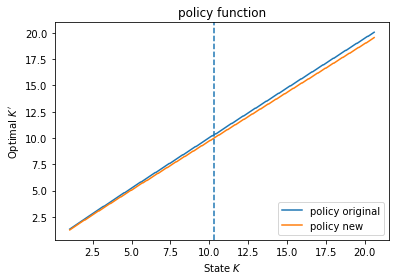

In [436]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_3000.keys(), policy2_3000.values(), label = 'policy original')
ax.plot(policy_new_delta.keys(), policy_new_delta.values(), label = 'policy new')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

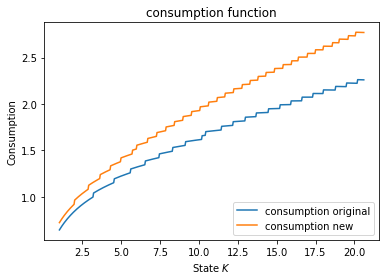

In [438]:
consumption2_3000 = []
consumption_new = []
for i in range(len(grid_500)):
    K = grid_500[i]
    temp_list = list(policy2_3000.values())
    temp_list_new = list(policy_new_delta.values())
    K_prime = temp_list[i]
    K_prime_new = temp_list_new[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)
    
    temp_new = A*(K**alpha) + (1-delta)*K - K_prime_new
    consumption_new.append(temp_new)
    

fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2_3000, label = 'consumption original')
ax.plot(grid2_500, consumption_new, label = 'consumption new')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

In [439]:
# (3) higher capital share
delta = float(0.05)
beta = float(0.98)
alpha = float(1/2)
gamma = float(2)
A = float(1)
value_new_delta, policy_new_delta = value_function(grid_500, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

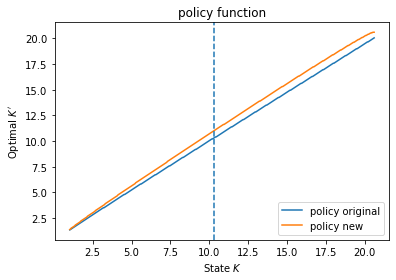

In [440]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_3000.keys(), policy2_3000.values(), label = 'policy original')
ax.plot(policy_new_delta.keys(), policy_new_delta.values(), label = 'policy new')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

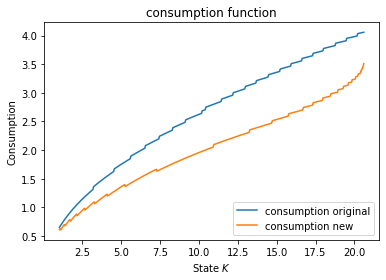

In [441]:
consumption2_3000 = []
consumption_new = []
for i in range(len(grid_500)):
    K = grid_500[i]
    temp_list = list(policy2_3000.values())
    temp_list_new = list(policy_new_delta.values())
    K_prime = temp_list[i]
    K_prime_new = temp_list_new[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)
    
    temp_new = A*(K**alpha) + (1-delta)*K - K_prime_new
    consumption_new.append(temp_new)
    

fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2_3000, label = 'consumption original')
ax.plot(grid2_500, consumption_new, label = 'consumption new')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

In [442]:
# (4) lower intertemporal elasticity of substitution
delta = float(0.05)
beta = float(0.98)
alpha = float(1/3)
gamma = float(3)
A = float(1)
value_new_delta, policy_new_delta = value_function(grid_500, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

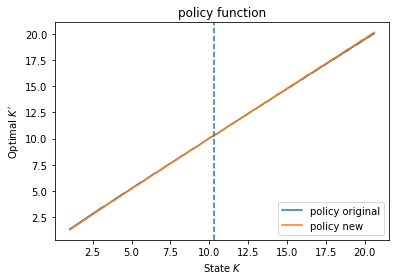

In [443]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_3000.keys(), policy2_3000.values(), label = 'policy original')
ax.plot(policy_new_delta.keys(), policy_new_delta.values(), label = 'policy new')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

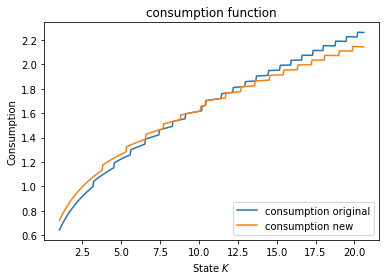

In [444]:
consumption2_3000 = []
consumption_new = []
for i in range(len(grid_500)):
    K = grid_500[i]
    temp_list = list(policy2_3000.values())
    temp_list_new = list(policy_new_delta.values())
    K_prime = temp_list[i]
    K_prime_new = temp_list_new[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)
    
    temp_new = A*(K**alpha) + (1-delta)*K - K_prime_new
    consumption_new.append(temp_new)
    

fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2_3000, label = 'consumption original')
ax.plot(grid2_500, consumption_new, label = 'consumption new')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

---

# 2. Shooting

In [362]:
def TVC_value(K, K_prime, T):
    numerator = (beta**T) * K * (A*alpha*(K**(alpha-1)) + (1-delta))
    denominator = (A*(K**alpha) + (1-delta)*K - K_prime)**gamma
    
    return (numerator/(denominator+threshold_weak)).real

<b>Strategy</b> <br>
With the feasibility correspondence we can calculate the maximum value, say $\hat{K}$, that we can choose for $K_1$ under given $K_0$
1. guess $K_1$ with half point between $\hat{K}$ and $K_0$
2. verify with TVC condition
3. if it works, end the procedure
4. elif it doesn't work update $K_1$ with the half point of $K_0$ and $K_1$

<b>Before then!</b> <br>
Calculate the optimal level of Large T with the Caution of <b><i>Remark 2</i></b> <br>
: steady state $\bar{K}$ should satisfy TVC condition with large enough T

### Calculate Optimal Large T

In [448]:
T_list = [T for T in range(500)]
TVC_list = [TVC_value(steady_K, steady_K, T) for T in T_list]

TVC value with T is 500 : 0.00015952337591273403


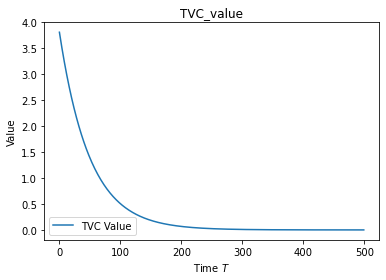

In [447]:
fig, ax = plt.subplots()  
ax.plot(T_list, TVC_list, label = 'TVC Value')

ax.set_title('TVC_value')
ax.set(xlabel='Time $T$',ylabel='Value')          # describe axes
ax.legend(loc='lower left')                      # display legend    

plt.show

print("TVC value with T is 500 :", TVC_list[-1])

observe that for T larger than 350, the TVC values get close to zero <br>
specifically, with T = 500, TVC value with steady state K is small enough <br>
so we will use T = 500

### Shooting Algorithm

In [445]:
delta = float(0.05)
beta = float(0.98)
alpha = float(1/3)
gamma = float(2)
A = float(1)

In [382]:
def K_t2(K_t0, K_t1):
    '''
    input: K_t0 and K_t1
    output: K_t2 spitted out from the Euler Equation
    '''
    temp1 = (A*(K_t1**alpha) + (1-delta)*K_t1).real
    temp2 = ((beta*(A*alpha*(K_t1**(alpha-1))+(1-delta)))**(1/gamma)).real
    temp3 = (A*(K_t0**alpha) + (1-delta)*K_t0 - K_t1).real
    
    K_t2 = temp1 - temp2*temp3
    
    #return round(K_t2, 6)
    return K_t2

In [508]:
# Set Large T
T = 300 

# Define given K_0
K_0 = 0.25 * steady_K

# Initial Guess
K_hat = (1-delta)*K_0 + A*(K_0**alpha)
K_low = 0 
K_1 = (K_hat + K_low)/2
TVC_right = []

while True:
    K_path = [K_0]
    K_path.append(K_1)
    
    for i in range(T-2):
        temp = K_t2(K_path[-2], K_path[-1])
        #temp = temp.real
        K_path.append(temp)
        temp_value = TVC_value(K_path[-2], K_path[-1], T)
        TVC_right.append(temp_value)
    
    
    #temp_value = temp_value.real
    
    if temp_value.real < 0.00001:
        break
    
    
    if K_path[-1] > steady_K:
        K_hat = K_1
        
    else:
        K_low = K_1
    
    K_1 = (K_hat+K_low)/2
    

In [493]:
K_path_right = K_path

In [503]:
T=300

K_path = [K_0]
K_path.append(5)
TVC_high = []

for i in range(T-2):
    temp = K_t2(K_path[-2], K_path[-1])
    #temp = temp.real
    K_path.append(temp)
    temp_value = TVC_value(K_path[-2], K_path[-1], T)
    TVC_high.append(temp_value)
        
K_path_high = K_path

In [504]:
K_path = [K_0]
K_path.append(2)
TVC_low = []

for i in range(T-2):
    temp = K_t2(K_path[-2], K_path[-1])
    #temp = temp.real
    K_path.append(temp)
    temp_value = TVC_value(K_path[-2], K_path[-1], T)
    TVC_low.append(temp_value)
    
K_path_low = K_path

[Text(0.5, 0, 'time $t$'), Text(0, 0.5, 'capital $k$')]

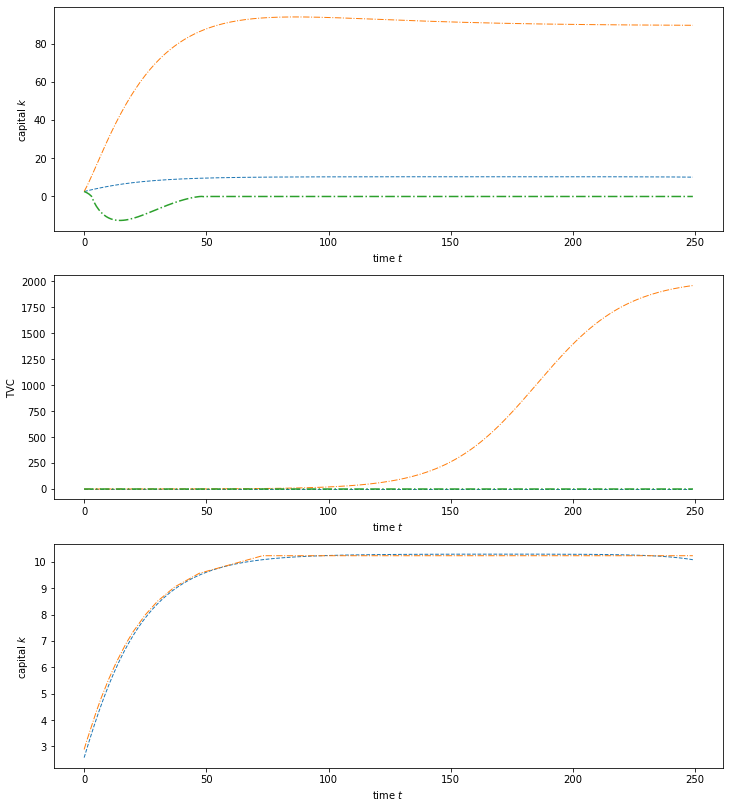

In [529]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(12,14))

time = list(range(250))

axes[0].plot(time, K_path_right[:250]      , '--',label='optimal path',linewidth=1)
axes[0].plot(time, K_path_high[:250], '-.',label='high',linewidth=1)
axes[0].plot(time, K_path_low[:250], '-.', label='low')
axes[0].set(xlabel='time $t$',ylabel  ='capital $k$')

axes[1].plot(time, TVC_right[:250], '--',label='optimal path',linewidth=1)
axes[1].plot(time, TVC_high[:250], '-.',label='high',linewidth=1)
axes[1].plot(time, TVC_low[:250], '-.', label='low')
axes[1].set(xlabel='time $t$',ylabel  ='TVC')

axes[2].plot(time, K_path_right[:250]      , '--',label='shooting',linewidth=1)
axes[2].plot(time, policy_path[:250], '-.',label='Value Function Iteration',linewidth=1)
axes[2].set(xlabel='time $t$',ylabel  ='capital $k$')

In [517]:
grid_500 = gridmaker(0.25*steady_K, 1.5*steady_K, 500)
value_500, policy_500 = value_function(grid_500, threshold_weak)

In [520]:
0.25 * steady_K

2.5752749535139072

In [521]:
policy_500.get(0.25 * steady_K)

2.8849272525336156

In [522]:
policy_path = []
policy_path.append(policy_500.get(0.25 * steady_K))
for i in range(300):
    policy_path.append(policy_500.get(policy_path[-1]))